# Predict Presence of Heart Disease using Random Forest and Logistic Regression

In [239]:
hd_data <- read.csv("datasets/Cleveland_hd.csv")

head(hd_data, 5)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [240]:
str(hd_data)

'data.frame':	303 obs. of  14 variables:
 $ age     : int  63 67 67 37 41 56 62 57 63 53 ...
 $ sex     : int  1 1 1 1 0 1 0 0 1 1 ...
 $ cp      : int  1 4 4 3 2 2 4 4 4 4 ...
 $ trestbps: int  145 160 120 130 130 120 140 120 130 140 ...
 $ chol    : int  233 286 229 250 204 236 268 354 254 203 ...
 $ fbs     : int  1 0 0 0 0 0 0 0 0 1 ...
 $ restecg : int  2 2 2 0 2 0 2 0 2 2 ...
 $ thalach : int  150 108 129 187 172 178 160 163 147 155 ...
 $ exang   : int  0 1 1 0 0 0 0 1 0 1 ...
 $ oldpeak : num  2.3 1.5 2.6 3.5 1.4 0.8 3.6 0.6 1.4 3.1 ...
 $ slope   : int  3 2 2 3 1 1 3 1 2 3 ...
 $ ca      : int  0 3 2 0 0 0 2 0 1 0 ...
 $ thal    : int  6 3 7 3 3 3 3 3 7 7 ...
 $ class   : int  0 2 1 0 0 0 3 0 2 1 ...


In [241]:
hd_data$class <- ifelse(hd_data$class >=1, 1, 0)

In [242]:
library(corrplot)
library(tidyverse)
library(ggcorrplot)
library(ggplot2)
library(plyr)
library(caret)

In [243]:
summary(hd_data)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :1.000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:3.000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :3.000   Median :130.0  
 Mean   :54.44   Mean   :0.6799   Mean   :3.158   Mean   :131.7  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :4.000   Max.   :200.0  
                                                                 
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :241.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.7   Mean   :0.1485   Mean   :0.9901   Mean   :149.6  
 3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
   

## Data Cleaning and Preparation

In [244]:
colSums(is.na(hd_data))

age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal    class 
       0        0        0        4        2        0

In [245]:
data <- na.omit(hd_data) 
colSums(is.na(data))

age      sex       cp trestbps     chol      fbs  restecg  thalach 
       0        0        0        0        0        0        0        0 
   exang  oldpeak    slope       ca     thal    class 
       0        0        0        0        0        0

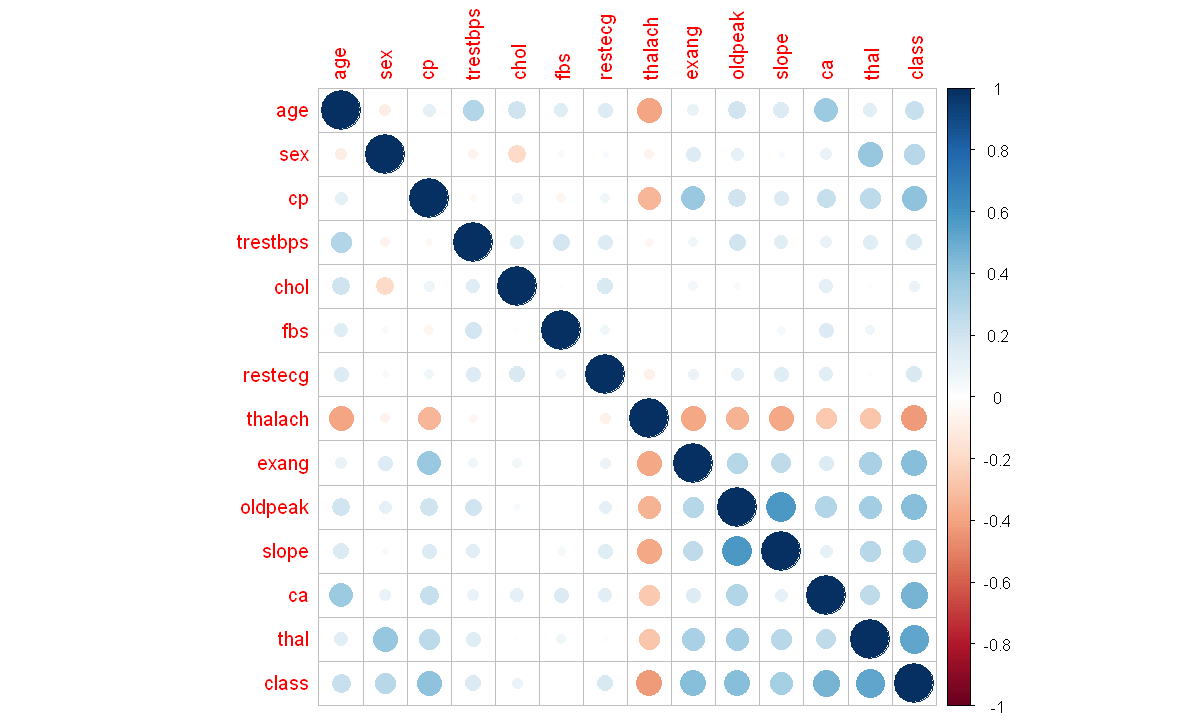

In [246]:
options(repr.plot.width =10, repr.plot.height =6)
corr <- cor(data)
corrplot(corr)

In [247]:
# Coverting the categorical data to factor
data$sex <- as.factor(data$sex)
data$class <- as.factor(data$class)
data$cp <- as.factor(data$cp)
data$fbs <- as.factor(data$fbs)
data$exang <- as.factor(data$exang)
data$slope <- as.factor(data$slope)
data$thal <- as.factor(data$thal)

In [248]:
data2 <- data

In [249]:
# Give a better name to the factor values for the graphs
data$sex <- ifelse(data$sex ==0, 'Female', 'Male')
levels(data$cp) <- c("Typical angina","Atypical angina", "No angina", "Asymptomatic")
data$exang <- ifelse(data$exang ==0, 'No', 'Yes')
levels(data$slope) <- c("Upsloping", "Flat", "Downsloping")
levels(data$thal) <- c("Normal","Fixed defect", "Reversible defect")
data$class <- ifelse(data$class ==0, 'No', 'Yes')

In [250]:
# deleting variables that has low correlation
data = subset(data, select = c(-fbs,-chol,-restecg))

## Exploratory Data Analysis

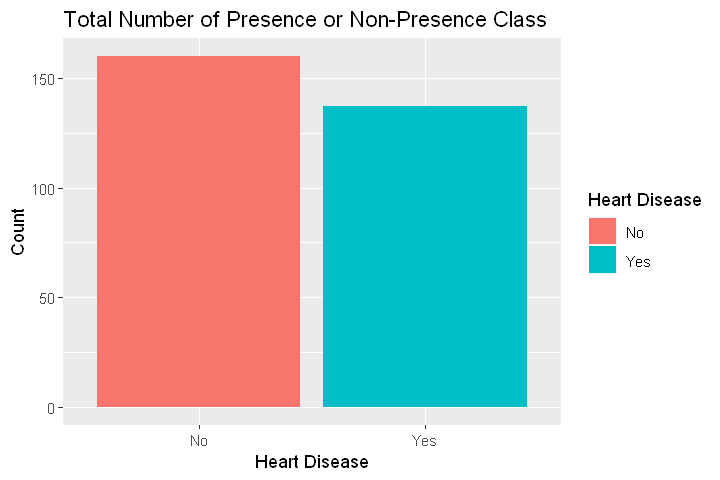

In [251]:
options(repr.plot.width =6, repr.plot.height =4)

ggplot(data, aes(x=data$class, fill=data$class)) + 
  geom_bar() +
  xlab("Heart Disease") +
  ylab("Count") +
  ggtitle("Total Number of Presence or Non-Presence Class") +
  scale_fill_discrete(name = "Heart Disease")

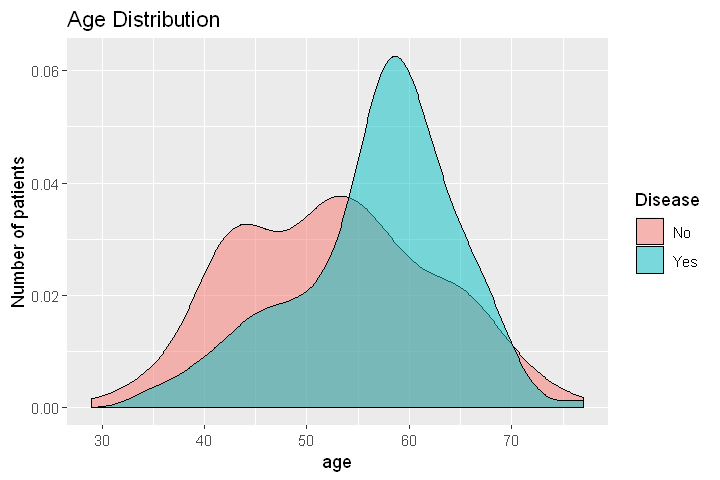

In [252]:
ggplot(data, aes(age, fill=class)) + 
  geom_density(alpha=0.5) +
  labs(fill="Disease", x="age", y="Number of patients")+
ggtitle("Age Distribution")

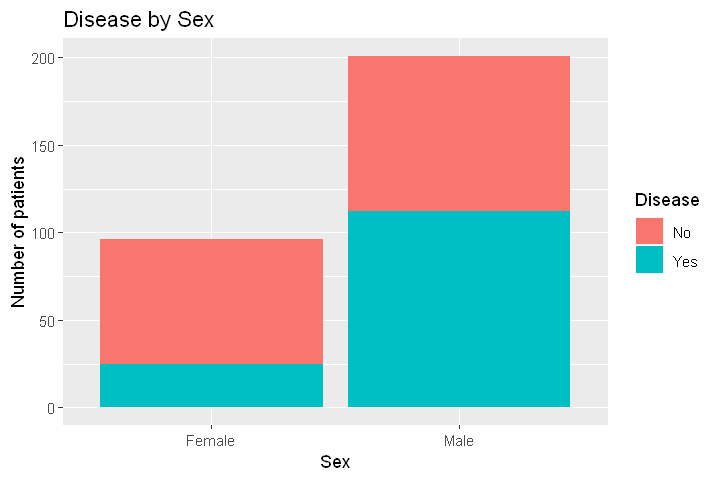

In [253]:
ggplot(data, aes(sex, fill=class)) + 
  geom_bar() +
  labs(fill="Disease", x="Sex", y="Number of patients") +
ggtitle("Disease by Sex")

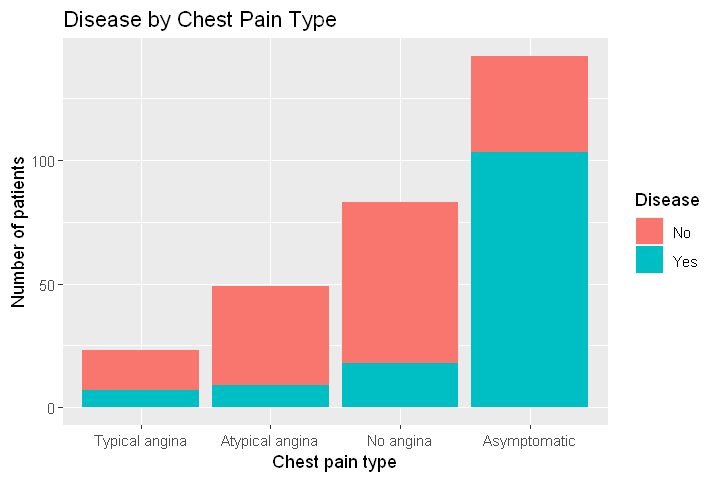

In [254]:
ggplot(data, aes(cp, fill=class)) +
  geom_bar() +
  labs(fill="Disease", x="Chest pain type", y="Number of patients") +
ggtitle('Disease by Chest Pain Type')


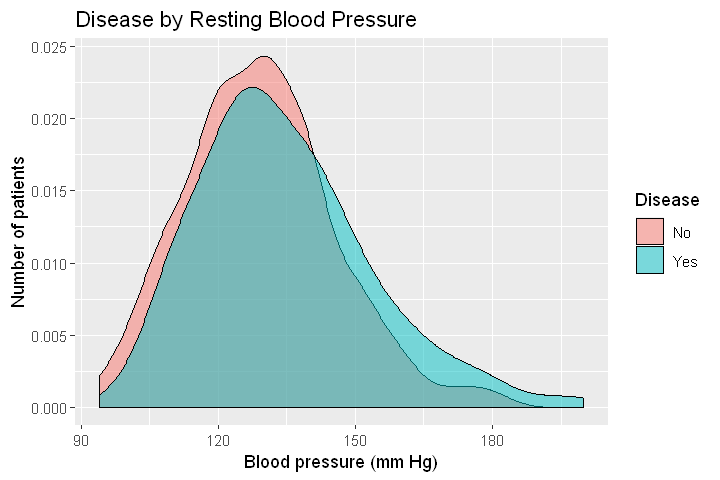

In [255]:
ggplot(data, aes(trestbps, fill=class)) +
  geom_density(alpha=0.5) +
  labs(fill="Disease", x="Blood pressure (mm Hg)", y="Number of patients")+
ggtitle('Disease by Resting Blood Pressure')

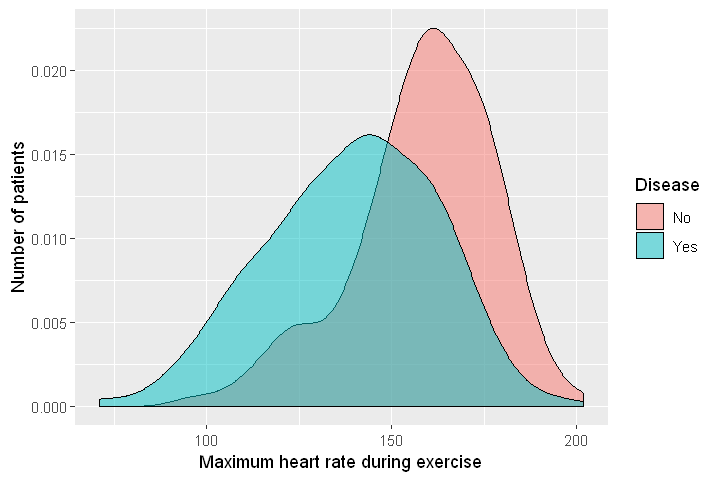

In [256]:
ggplot(data, aes(thalach, fill=class)) +
  geom_density(alpha=0.5) +
  labs(fill="Disease", x="Maximum heart rate during exercise", y="Number of patients")

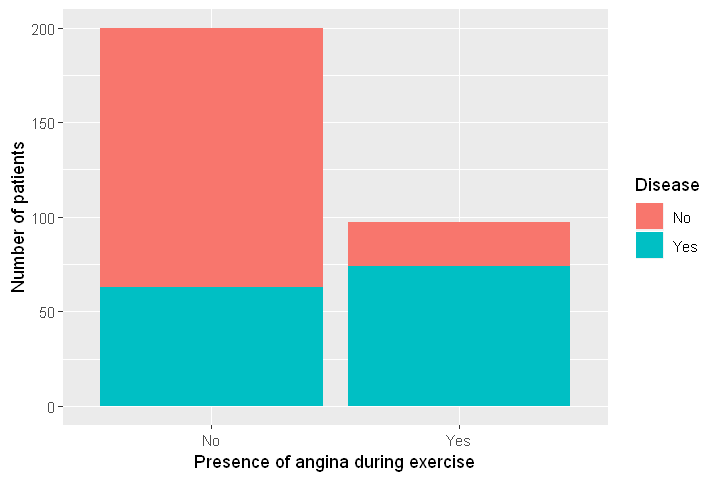

In [257]:
ggplot(data, aes(exang, fill=class)) +
  geom_bar() +
  labs(fill="Disease", x="Presence of angina during exercise", y="Number of patients")

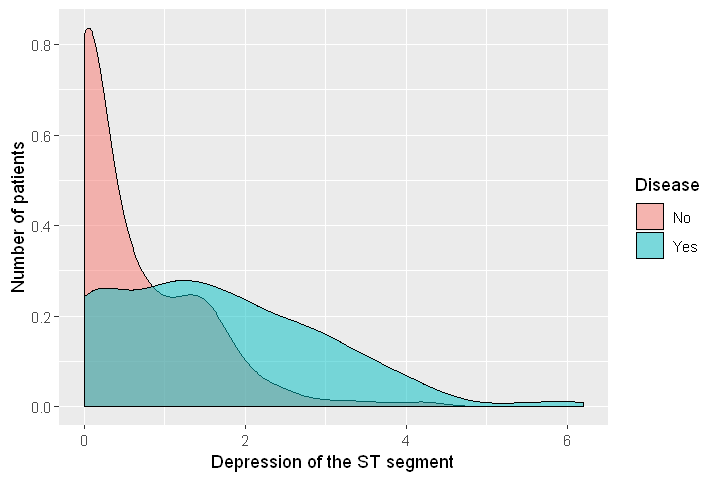

In [258]:
ggplot(data, aes(oldpeak, fill=class)) +
  geom_density(alpha=0.5) +
  labs(fill="Disease", x="Depression of the ST segment", y="Number of patients")

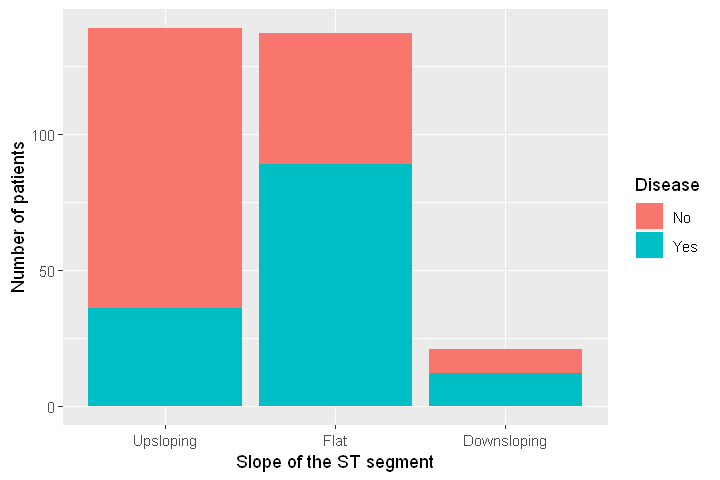

In [259]:
ggplot(data, aes(slope, fill=class)) +
  geom_bar() +
  labs(fill="Disease", x="Slope of the ST segment", y="Number of patients")

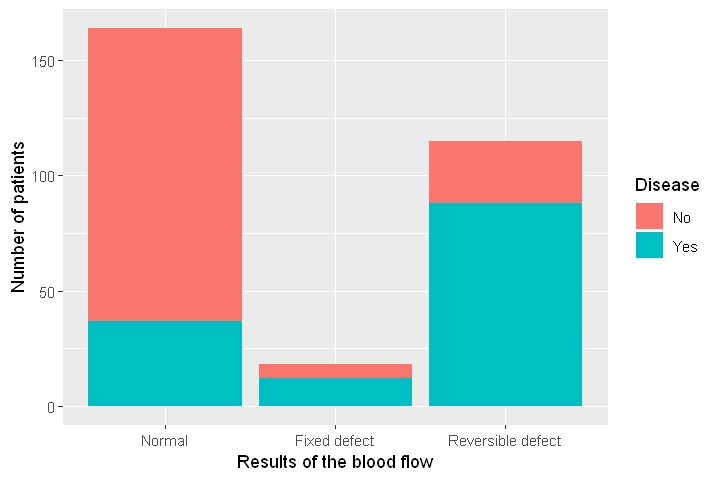

In [260]:
ggplot(data, aes(thal, fill=class)) +
  geom_bar() +
  labs(fill="Disease", x="Results of the blood flow", y="Number of patients")

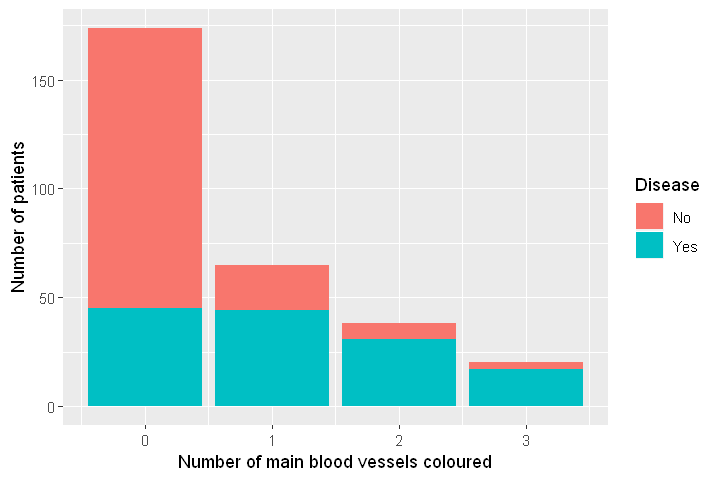

In [261]:
ggplot(data, aes(ca, fill=class)) +
  geom_bar() +
  labs(fill="Disease", x="Number of main blood vessels coloured", y="Number of patients")

## Modeling

In [262]:
set.seed(8)
training_indeces <- createDataPartition(data2$class, p = .7, list = FALSE)
data2.train <- data2[ training_indeces,]
data2.test  <- data2[-training_indeces,]

# 10 fold Cross-validation
fitControl <- trainControl(method="cv", number=10)

In [265]:
set.seed(8)
model.lr <- train(class ~ ., 
              data = data2.train,
              method = "glm",
              family=binomial(),
              trControl = fitControl)
model.lr

Generalized Linear Model 

208 samples
 13 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 187, 187, 188, 186, 188, 187, ... 
Resampling results:

  Accuracy  Kappa    
  0.822316  0.6397655


In [266]:
set.seed(8)
model.rf <- train(class ~ ., 
              data = data2.train,
              method = "rf",
              trControl = fitControl)
model.rf

Random Forest 

208 samples
 13 predictor
  2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 187, 187, 188, 186, 188, 187, ... 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8130303  0.6198014
   9    0.8327706  0.6623766
  17    0.8229870  0.6414774

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 9.

In [268]:
preds <- predict(model.lr, data2.test)
confusionMatrix(preds, data2.test$class)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 41  9
         1  7 32
                                          
               Accuracy : 0.8202          
                 95% CI : (0.7245, 0.8936)
    No Information Rate : 0.5393          
    P-Value [Acc > NIR] : 2.567e-08       
                                          
                  Kappa : 0.6369          
                                          
 Mcnemar's Test P-Value : 0.8026          
                                          
            Sensitivity : 0.8542          
            Specificity : 0.7805          
         Pos Pred Value : 0.8200          
         Neg Pred Value : 0.8205          
             Prevalence : 0.5393          
         Detection Rate : 0.4607          
   Detection Prevalence : 0.5618          
      Balanced Accuracy : 0.8173          
                                          
       'Positive' Class : 0               
                                    

In [269]:
preds <- predict(model.rf, data2.test)
confusionMatrix(preds, data2.test$class)

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 42 11
         1  6 30
                                          
               Accuracy : 0.809           
                 95% CI : (0.7119, 0.8846)
    No Information Rate : 0.5393          
    P-Value [Acc > NIR] : 9.657e-08       
                                          
                  Kappa : 0.6122          
                                          
 Mcnemar's Test P-Value : 0.332           
                                          
            Sensitivity : 0.8750          
            Specificity : 0.7317          
         Pos Pred Value : 0.7925          
         Neg Pred Value : 0.8333          
             Prevalence : 0.5393          
         Detection Rate : 0.4719          
   Detection Prevalence : 0.5955          
      Balanced Accuracy : 0.8034          
                                          
       'Positive' Class : 0               
                                    